### Conda info

1. Per vedere tutti gli ambienti presenti:
        conda info --envs
        # l'env attivo è quello con "*"
1. Aprire la sheel dell'ambiente `base`:
        conda activate base
        # Oppure se il primo non va:
        source activate base
1. Per chiudere la sheel dell'ambiente `base`:
        conda deactivate

Con la shell attiva:

    pip install tensorflow==2.1.0
    conda list tensorflow

Di default l'env utilizzando da jupyter notebook è quello `base`

In [1]:
import sys
print(sys.prefix)
print(sys.version)

/Users/marcocaldera/anaconda3
3.6.9 |Anaconda custom (64-bit)| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


### First Notebook using Fashion-MNIST

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [3]:
import numpy as np
import pandas as dp
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist
type(mnist)

module

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train: 60000 righe/esempi, dove ogni riga è una matrice 28x28 (pixel)
# y_train: 60000 label, una per ogni riga/esempio
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
np.max(X_train), np.mean(X_train)

(255, 72.94035223214286)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Data Exploration

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Label:  9


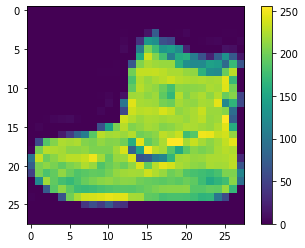

In [9]:
plt.figure()
print("Label: ", y_train[0])
plt.imshow(X_train[0])
plt.colorbar()

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Label:  9


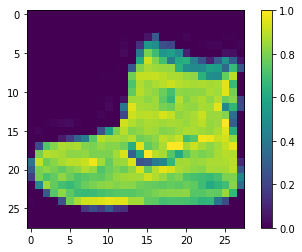

In [11]:
plt.figure()
print("Label: ", y_train[0])
plt.imshow(X_train[0])
plt.colorbar()

### Build the model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [39]:
model = Sequential()
model.add(Flatten(input_shape= (28,28))) # transforma 28x28 in un vettore unico di 784 elementi
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Il livello `dense_2` ha 784*128+128 = 100480 parametri in quanto ogni

    - Ognuno dei 784 neuroni di input è collegato a 128 neuroni di output (100352 archi) e dato che ogni arco ha un peso abbiamo 100352 pesi w
    - Ogniuno dei 128 neuroni di arrivo ha un bias associato, quindi dobbiamo sommare a 100352 anche 128 bias

### Model fit and evalutation
- Loss function
- Optimizer
- Metrics

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
# epochs corrisponde al numero di volte in cui la nostra rete vedi i dati (che vengono randomizzati)
# 0.2 % dei dati vengono utilizzati come validation set
history = model.fit(X_train, y_train, epochs = 10, batch_size = 50, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 52us/sample - loss: 0.5199 - accuracy: 0.8191 - val_loss: 0.4227 - val_accuracy: 0.8508
Epoch 2/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.3966 - accuracy: 0.8587 - val_loss: 0.4112 - val_accuracy: 0.8527
Epoch 3/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.3522 - accuracy: 0.8732 - val_loss: 0.3542 - val_accuracy: 0.8743
Epoch 4/10
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3255 - accuracy: 0.8817 - val_loss: 0.3483 - val_accuracy: 0.8723
Epoch 5/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3055 - accuracy: 0.8884 - val_loss: 0.3464 - val_accuracy: 0.8759
Epoch 6/10
48000/48000 [==============================] - 2s 48us/sample - loss: 0.2915 - accuracy: 0.8926 - val_loss: 0.3471 - val_accuracy: 0.8732
Epoch 7/10
48000/48000 [==============================] 

In [49]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3600 - accuracy: 0.8760
0.876


In [50]:
from sklearn.metrics import accuracy_score

# rispetto a model.predict, predict_classes restituisce direttamente la classe con il valore più alto
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.876

In [51]:
pred = model.predict(X_test)
print(y_test[0])
print(pred[0])
print(np.argmax(pred[0]))

9
[1.9712422e-06 5.1824038e-08 3.3377631e-08 2.3318384e-07 1.1836930e-07
 2.2668790e-03 2.3180394e-06 2.1869779e-02 3.2600710e-06 9.7585535e-01]
9


### Plotting learning curve and confusion metrix

In [20]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.co

In [46]:
history.history

{'loss': [0.5199115663611641,
  0.39660230968147514,
  0.3521633574273437,
  0.32553340766268474,
  0.30546067954661943,
  0.29148362171836195,
  0.2789219131770854,
  0.2646863261043715,
  0.2540893317588295,
  0.24633191192212203],
 'accuracy': [0.81914586,
  0.8586875,
  0.87320834,
  0.8817083,
  0.888375,
  0.8925833,
  0.897125,
  0.90216666,
  0.9055833,
  0.90870833],
 'val_loss': [0.42273400916407505,
  0.4112384916593631,
  0.35419627018272876,
  0.3483255685617526,
  0.34643075773492454,
  0.3471189746943613,
  0.33286981685087086,
  0.31912982103725274,
  0.33793554805840054,
  0.3398107470323642],
 'val_accuracy': [0.85075,
  0.8526667,
  0.8743333,
  0.87225,
  0.87591666,
  0.8731667,
  0.87983334,
  0.8860833,
  0.87883335,
  0.88166666]}

In [26]:
import matplotlib.pyplot as plt

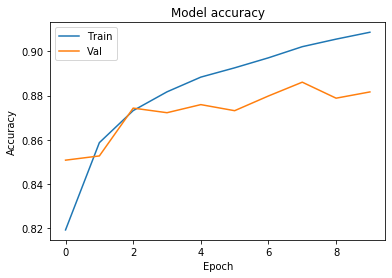

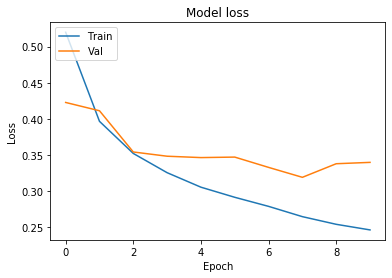

In [48]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#### Plot confusion matrix

In [63]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16d0d85f8>)

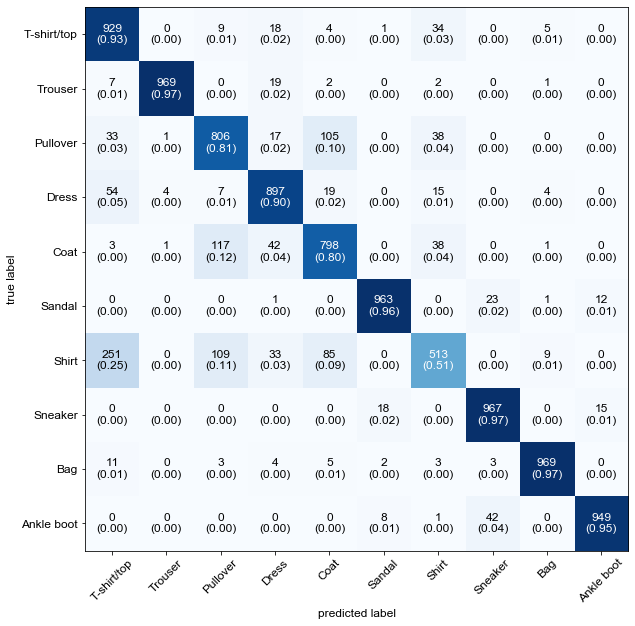

In [67]:
font = {
    'family': 'Arial',
    # 'family': 'Times New Roman',
    # 'weight': 'normal',
    'size': 12
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
# show_normed = per mostrare le precisione di ogni cella
plot_confusion_matrix(conf_mat=mat, figsize=(10,10), class_names = class_names, show_normed=True)